In [2]:
library('dplyr')
library('effsize')
library('ggplot2')
library('foreign')
library('pscl')
library('ggrepel')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis



In [9]:
dfMDD = read.csv('../Data/dfMDDMDDCurrPrin_satisfaction_rdq_dx_demo.csv')
log = read.spss('../Data/DemosDx/Tx Day Consent Log_1.sav')
nrow(dfMDD)
demo = read.spss('../Data/DemosDx/Demographics Form_1.sav')
dx = read.spss('../Data/DemosDx/Diagnosis_1.sav')

Warning message in read.spss("../Data/DemosDx/Tx Day Consent Log_1.sav"):
“Undeclared level(s) 0, 11, 12 added in variable: DC_status_1”
Warning message in read.spss("../Data/DemosDx/Tx Day Consent Log_1.sav"):
“Duplicated levels in factor DC_status_1: Other”
Warning message in read.spss("../Data/DemosDx/Tx Day Consent Log_1.sav"):
“Undeclared level(s) 2 added in variable: SCID_1”
Warning message in read.spss("../Data/DemosDx/Tx Day Consent Log_1.sav"):
“Undeclared level(s) 0 added in variable: Referral_1”


[1] 844

Warning message in read.spss("../Data/DemosDx/Demographics Form_1.sav"):
“Undeclared level(s) 6 added in variable: Race_1”
Warning message in read.spss("../Data/DemosDx/Demographics Form_1.sav"):
“Undeclared level(s) 8 added in variable: Relationship_1”
Warning message in read.spss("../Data/DemosDx/Diagnosis_1.sav"):
“../Data/DemosDx/Diagnosis_1.sav: Long string value labels record found (record type 7, subtype 21), but ignored”
Warning message in read.spss("../Data/DemosDx/Diagnosis_1.sav"):
“Undeclared level(s) 22 added in variable: eatnos_1”
Warning message in read.spss("../Data/DemosDx/Diagnosis_1.sav"):
“Undeclared level(s) 10 added in variable: addhpr_1”


In [10]:
str(demo)

List of 13
 $ ID1             : num [1:7210] 1 2 3 4 5 6 7 8 9 10 ...
 $ Initials        : chr [1:7210] "FG                              " "MB                              " "MM                              " "ET                              " ...
 $ Age_1           : num [1:7210] 65 67 44 31 47 28 23 47 22 54 ...
 $ DOB_1           : num [1:7210] 1.15e+10 1.15e+10 1.22e+10 1.26e+10 1.21e+10 ...
 $ Sex_1           : Factor w/ 4 levels "Female","Male",..: 1 1 2 1 1 1 1 1 1 1 ...
 $ Gender_1        : Factor w/ 5 levels "Female","Male",..: 1 1 2 1 1 1 1 1 1 1 ...
 $ OtherGender_1   : chr [1:7210] "                              " "                              " "                              " "                              " ...
 $ Race_1          : Factor w/ 7 levels "White","Black",..: 1 1 1 1 3 1 1 1 1 1 ...
 $ Relationship_1  : Factor w/ 7 levels "Married","Living with someone",..: 5 3 1 1 4 1 6 6 6 5 ...
 $ Education_1     : Factor w/ 9 levels "Grade 6 or less",..: 6 6 5 8 5 5 5 6 5

In [11]:
#SCID'd patients
table(merge(dfMDD, log, by = 'ID1')$SCID_1 )



 no yes   2 
467 357  18 

In [11]:
dfMDD_demo = merge(dfMDD, demo, by = 'ID1')
table(dfMDD_demo$Gender_1)
round(table(dfMDD_demo$Gender_1)/844*100,1)
18/844*100
summary(dfMDD_demo$Age_1)
sd(dfMDD_demo$Age_1)



                                         Female 
                                            550 
                                           Male 
                                            265 
                                     Non-Binary 
                                             10 
                                          Other 
                                              8 
Unknown (ID as Trans Before Demos Change 12.18) 
                                             10 


                                         Female 
                                           65.2 
                                           Male 
                                           31.4 
                                     Non-Binary 
                                            1.2 
                                          Other 
                                            0.9 
Unknown (ID as Trans Before Demos Change 12.18) 
                                            1.2 

[1] 2.132701

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   25.00   34.00   36.76   47.00   82.00 

[1] 13.85607

In [6]:
table(dfMDD_demo$Relationship_1)

round(table(dfMDD_demo$Relationship_1)/844*100,1)

ERROR: Error in table(dfMDD_demo$Relationship_1): object 'dfMDD_demo' not found


In [13]:
table(dfMDD_demo$Education_1)

round(table(dfMDD_demo$Education_1)/844*100,1)

172 + 46 + 99
(172 + 46 + 99)/844*100


                       Grade 6 or less       Grade 7-12 without graduating HS 
                                     0                                     30 
                          Graduated HS                           Received GED 
                                    85                                     34 
                          Some college               Graduated 2 year college 
                                   276                                    102 
              Graduated 4 year college      Some graduate/professional school 
                                   172                                     46 
Completed graduate/professional school 
                                    99 


                       Grade 6 or less       Grade 7-12 without graduating HS 
                                   0.0                                    3.6 
                          Graduated HS                           Received GED 
                                  10.1                                    4.0 
                          Some college               Graduated 2 year college 
                                  32.7                                   12.1 
              Graduated 4 year college      Some graduate/professional school 
                                  20.4                                    5.5 
Completed graduate/professional school 
                                  11.7 

[1] 317

[1] 37.55924

In [110]:
table(dfMDD_demo$Race_1)

round(table(dfMDD_demo$Race_1)/844*100,1)

18+37
(18+37)/844*100


     White      Black   Hispanic      Asian Portuguese      Other          6 
       649         43         70         27         18         37          0 


     White      Black   Hispanic      Asian Portuguese      Other          6 
      76.9        5.1        8.3        3.2        2.1        4.4        0.0 

[1] 55

[1] 6.516588

In [15]:
table(dfMDD$imprv1)/844*100


        0         1         2         3         4 
 3.436019  7.701422 21.445498 41.706161 25.710900 

In [16]:
41.706161 + 25.710900 

[1] 67.41706

In [12]:
dfMDD$pre_cope_r = abs(dfMDD$pre_cope-2)
dfMDD$pre_pmh_r = abs(dfMDD$pre_pmh-2)
dfMDD$pre_fun_r = abs(dfMDD$pre_fun-2)
dfMDD$pre_well_r = abs(dfMDD$pre_well-2)
dfMDD$post_cope_r = abs(dfMDD$post_cope-2)
dfMDD$post_pmh_r = abs(dfMDD$post_pmh-2)
dfMDD$post_fun_r = abs(dfMDD$post_fun-2)
dfMDD$post_well_r = abs(dfMDD$post_well-2)

In [13]:
dfMDD$pre_dsym_sum = rowSums(dfMDD[grep('rdqpre_[1-9]_1|rdqpre_1[0-4]_1', colnames(dfMDD))])
dfMDD$pre_ndsym_sum = rowSums(dfMDD[grep('rdqpre_1[5-9]_1|rdqpre_2[0-5]_1', colnames(dfMDD))])
dfMDD$pre_cope_r_sum = rowSums(abs(dfMDD[grep('rdqpre_2[6-9]_1|rdqpre_30_1', colnames(dfMDD))]-2))
dfMDD$pre_pmh_r_sum = rowSums(abs(dfMDD[grep('rdqpre_3[1-9]_1|rdqpre_4[0-2]_1', colnames(dfMDD))]-2))
dfMDD$pre_fun_r_sum = rowSums(abs(dfMDD[grep('rdqpre_4[3-9]_1|rdqpre_5[0-2]_1', colnames(dfMDD))]-2))
dfMDD$pre_well_r_sum = rowSums(abs(dfMDD[grep('rdqpre_5[3-9]_1|rdqpre_69_1', colnames(dfMDD))]-2))

dfMDD$post_dsym_sum = rowSums(dfMDD[grep('rdqpost_[1-9]_1|rdqpost_1[0-4]_1', colnames(dfMDD))])
dfMDD$post_ndsym_sum = rowSums(dfMDD[grep('rdqpost_1[5-9]_1|rdqpost_2[0-5]_1', colnames(dfMDD))])
dfMDD$post_cope_r_sum = rowSums(abs(dfMDD[grep('rdqpost_2[6-9]_1|rdqpost_30_1', colnames(dfMDD))]-2))
dfMDD$post_pmh_r_sum = rowSums(abs(dfMDD[grep('rdqpost_3[1-9]_1|rdqpost_4[0-2]_1', colnames(dfMDD))]-2))
dfMDD$post_fun_r_sum = rowSums(abs(dfMDD[grep('rdqpost_4[3-9]_1|rdqpost_5[0-2]_1', colnames(dfMDD))]-2))
dfMDD$post_well_r_sum = rowSums(abs(dfMDD[grep('rdqpost_5[3-9]_1|rdqpost_69_1', colnames(dfMDD))]-2))
                                                            

In [14]:
dfMDD = dfMDD[dfMDD$pre_dsym_sum-dfMDD$post_dsym_sum <= dfMDD$pre_dsym_sum*0.5,]
dfMDD

,X,ID1,rdqpre_1_1,rdqpre_2_1,rdqpre_3_1,rdqpre_4_1,rdqpre_5_1,rdqpre_6_1,rdqpre_7_1,rdqpre_8_1,⋯,pre_cope_r_sum,pre_pmh_r_sum,pre_fun_r_sum,pre_well_r_sum,post_dsym_sum,post_ndsym_sum,post_cope_r_sum,post_pmh_r_sum,post_fun_r_sum,post_well_r_sum
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1359,1,2,2,0,2,2,0,1,⋯,4,20,17,14,15,8,1,9,9,8
3,7,1400,2,2,2,1,1,2,0,2,⋯,10,22,15,14,18,18,7,14,14,8
5,14,1420,2,2,2,1,0,1,2,2,⋯,9,22,13,13,20,11,8,17,9,11
7,17,1426,2,2,2,0,1,2,0,2,⋯,9,19,20,13,21,22,8,13,15,13
8,18,1429,2,1,2,1,0,1,1,2,⋯,7,17,8,10,14,11,7,16,8,9
10,22,1463,2,2,2,2,2,0,2,2,⋯,8,24,18,0,15,3,2,14,11,11
11,23,1467,2,2,2,0,0,0,0,2,⋯,10,22,11,12,11,2,5,10,8,8
12,24,1486,2,1,1,2,0,1,1,1,⋯,5,14,13,12,9,3,3,15,4,9
13,27,1510,2,2,2,0,2,0,2,2,⋯,5,18,17,6,16,15,7,17,16,10


In [21]:
dfMDD_log = merge(dfMDD, log, all.X = T, by = 'ID1')
table(dfMDD_log$bord_1, dfMDD_log$SCID_1)

             
               no yes   2
  Curr         62  39   7
  Curr, Prin    0   0   0
  Not present 235 163   9

In [22]:
62+39+7

[1] 108

In [1]:
str(dfMDD)

ERROR: Error in str(dfMDD): object 'dfMDD' not found


In [123]:
facets = c('dsym', 'ndsym', 'cope_r', 'pmh_r', 'fun_r', 'well_r')
prePostMean = matrix(0, nrow = 6, ncol = 4)

for (i in 1:length(facets)){
    facet = facets[i]
    preScore = dfMDD[,grep(paste0('pre_', facet,'_sum'), colnames(dfMDD))]
    postScore = dfMDD[,grep(paste0('post_', facet,'_sum'), colnames(dfMDD))]
    prePostMean[i, 1] = paste0(round(mean(preScore),2),' (', round(sd(preScore),2),')')
    prePostMean[i, 2] = paste0(round(mean(postScore),2),' (', round(sd(postScore),2),')')
    prePostMean[i, 3] = round(cohen.d(preScore, postScore)$estimate, 2)
    prePostMean[i, 4] = paste0(
        round(sum(ifelse((preScore-postScore) >= 0.5*preScore, 1, 0))/nrow(dfMDD )*100, 2),'% (', 
        sum(ifelse((preScore-postScore) >= 0.5*preScore, 1, 0)),')')   
}

prePostMean = as.data.frame(prePostMean)
colnames(prePostMean) = c('Admission M(SD)', 'Discharge M(SD)', "Cohen's d", 'Responders %(n)')
rownames(prePostMean) = facets
write.csv(prePostMean, '../Results/prePostRDQMeanSD_Cohen_50Responder.csv')

prePostMean

,Admission M(SD),Discharge M(SD),Cohen's d,Responders %(n)
,<fct>,<fct>,<fct>,<fct>
dsym,19.21 (4.36),14.7 (4.76),0.99,7.35% (38)
ndsym,14.39 (4.9),10.92 (5.29),0.68,21.47% (111)
cope_r,7.37 (2.07),5.73 (2.25),0.76,19.92% (103)
pmh_r,19.23 (4.1),14.81 (5.28),0.94,14.31% (74)
fun_r,13.24 (3.77),10.32 (4.28),0.72,18.38% (95)
well_r,11.68 (2.61),9.14 (3.36),0.84,16.83% (87)


In [124]:
nRDQResponder = matrix(0, ncol = 6, nrow = nrow(dfMDD))
for (i in 3:length(facets)){
    facet = facets[i]
    preScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    
    nRDQResponder[,i] = ifelse((preScore-postScore) > 0.5*preScore, 1, 0)
    
}

nRDQResponderTable = as.data.frame(table(rowSums(nRDQResponder)))
nRDQResponderTable$percent = paste0(round(nRDQResponderTable$Freq/nrow(dfMDD)*100,2),'%')
#write.csv(nRDQResponderTable, '../Results/nRDQResponderTable.csv', row.names = F)
nRDQResponderTable

Var1,Freq,percent
<fct>,<int>,<chr>
0,366,70.79%
1,75,14.51%
2,39,7.54%
3,26,5.03%
4,11,2.13%


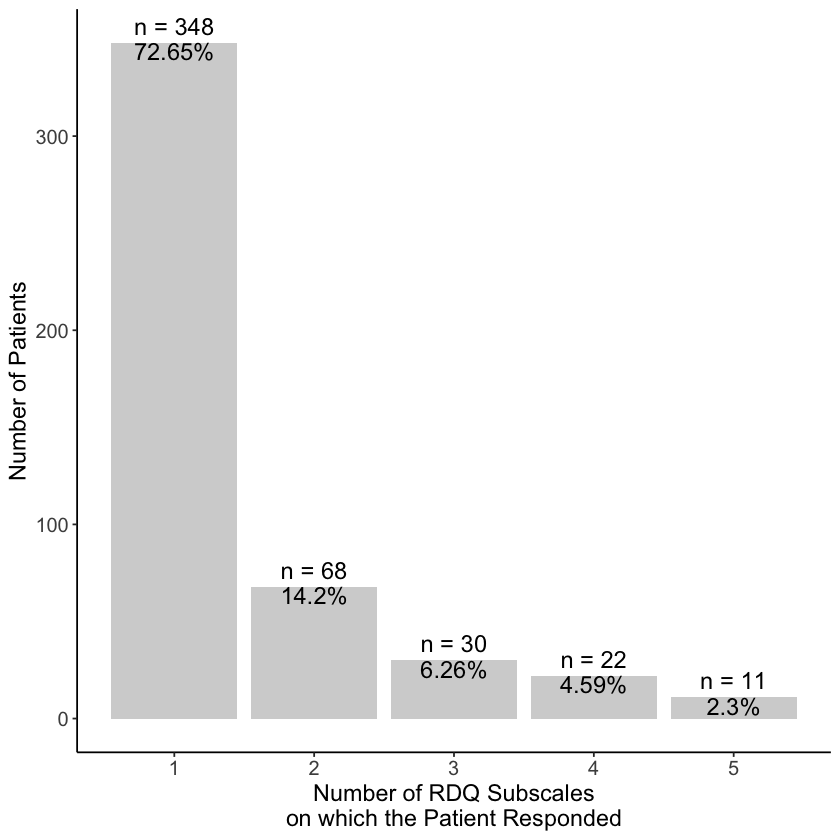

In [118]:
ggplot(nRDQResponderTable, aes(x=as.numeric(Var1), y = Freq)) +
    geom_bar(stat = 'identity', fill = 'light grey') + 
    geom_text(aes(label=paste0('n = ',Freq)), position='identity', size=5, vjust = -0.5) +
    geom_text(aes(label=percent), position='identity', size=5, vjust=1) +
    scale_x_continuous(breaks = seq(0, 6, by = 1)) +
    theme_classic() +
    xlab("Number of RDQ Subscales\non which the Patient Responded") + 
    ylab("Number of Patients") +
    theme(
      axis.title.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.x = element_text(size = 12),
      axis.text.y = element_text(size = 12)) 
#+ ggsave('../Results/RDQResponderImprv.pdf',width = 8, height = 8)


In [56]:
mean(rowSums(nRDQResponder))
sd(rowSums(nRDQResponder))

[1] 0.7195358

[1] 1.139778

In [125]:
nRDQResponderPairwisePercent = matrix(0, ncol = 6, nrow = 7)

for (i in 1:length(facets)){
    for (j in 1:length(facets)){
        facet1 = facets[i]
        facet2 = facets[j]
        
        preScore1 = dfMDD[,grep(paste0('pre_', facet1,'$'), colnames(dfMDD))]
        postScore1 = dfMDD[,grep(paste0('post_', facet1,'$'), colnames(dfMDD))]
        preScore2 = dfMDD[,grep(paste0('pre_', facet2,'$'), colnames(dfMDD))]
        postScore2 = dfMDD[,grep(paste0('post_', facet2,'$'), colnames(dfMDD))]
    
        facet2Res = which((preScore2-postScore2) > 0.5*preScore2)
        facet1ResIn2 = sum(preScore1[facet2Res] - postScore1[facet2Res] > 0.5*preScore1[facet2Res]
                          )/length(facet2Res)*100
        
        nRDQResponderPairwisePercent[i,j] =  facet1ResIn2
    }
}
diag(nRDQResponderPairwisePercent) = NA
nRDQResponderPairwisePercent[7,] = colMeans(nRDQResponderPairwisePercent[1:6,], na.rm = T)
nRDQResponderPairwisePercent = as.data.frame(nRDQResponderPairwisePercent)
colnames(nRDQResponderPairwisePercent) = rownames(nRDQResponderPairwisePercent)[1:6] = facets
rownames(nRDQResponderPairwisePercent)[7] = 'average'
nRDQResponderPairwisePercent = apply(nRDQResponderPairwisePercent, 2, function(x) paste0(round(x,2),'%'))
diag(nRDQResponderPairwisePercent) = NA

#write.csv(nRDQResponderPairwisePercent, '../Results/nRDQResponderPairwisePercent.csv')

nRDQResponderPairwisePercent

dsym,ndsym,cope_r,pmh_r,fun_r,well_r
NA,0%,0%,0%,0%,0%
NaN%,NA,42.86%,26.87%,40.74%,33.33%
NaN%,30.93%,NA,35.82%,40.74%,45.61%
NaN%,18.56%,34.29%,NA,37.04%,61.4%
NaN%,34.02%,47.14%,44.78%,NA,61.4%
NaN%,19.59%,37.14%,52.24%,43.21%,NA
NaN%,20.62%,32.29%,31.94%,32.35%,40.35%


In [126]:
mean(dfMDD$imprv1)
sd(dfMDD$imprv1)
table(dfMDD$imprv1)
round(table(dfMDD$imprv1)/844*100,1)
352 +217
(352 +217)/844*100

[1] 2.421663

[1] 1.03624


  0   1   2   3   4 
 28  63 156 203  67 


   0    1    2    3    4 
 3.3  7.5 18.5 24.1  7.9 

[1] 569

[1] 67.41706

In [127]:
imprvByNRDQ = 
    data.frame(nRDQRespond = rowSums(nRDQResponder[,3:6]), imprv = dfMDD$imprv1) %>%
        group_by(nRDQRespond) %>%
        summarize(n = n(), `M(SD)` = paste0(round(mean(imprv),2),' (', round(sd(imprv),2),')'))

imprvByNRDQ

`summarise()` ungrouping output (override with `.groups` argument)



nRDQRespond,n,M(SD)
<dbl>,<int>,<chr>
0,366,2.17 (1.02)
1,75,2.81 (0.67)
2,39,3.23 (0.81)
3,26,3.15 (1.08)
4,11,3.45 (0.52)


In [128]:
imprvByNRDQTtestData = data.frame(nRDQRespond = rowSums(nRDQResponder[,3:6]), imprv = dfMDD$imprv1)
imprvByNRDQ$t_val = NA
imprvByNRDQ$p_val = NA

for (i in 0:3){
    sample1 = imprvByNRDQTtestData[imprvByNRDQTtestData$nRDQRespond== i,'imprv'] 
    sample2 = imprvByNRDQTtestData[imprvByNRDQTtestData$nRDQRespond== i+1, 'imprv'] 
   
    tRes = t.test(sample1,sample2)
   
    imprvByNRDQ$t_val[i+1] = round(tRes$statistic,2)
    imprvByNRDQ$p_val[i+1] = round(tRes$p.value, 3)
}

write.csv(imprvByNRDQ, '../Results/imprvByNRDQ.csv')
imprvByNRDQ

nRDQRespond,n,M(SD),t_val,p_val
<dbl>,<int>,<chr>,<dbl>,<dbl>
0,366,2.17 (1.02),-6.82,0.000
1,75,2.81 (0.67),-2.76,0.007
2,39,3.23 (0.81),0.31,0.759
3,26,3.15 (1.08),-1.14,0.264
4,11,3.45 (0.52),NA,NA


In [129]:
table(imprvByNRDQTtestData$nRDQRespond)


  0   1   2   3   4 
366  75  39  26  11 

In [130]:
summary(aov(imprv ~ as.factor(nRDQRespond), imprvByNRDQTtestData))

                        Df Sum Sq Mean Sq F value Pr(>F)    
as.factor(nRDQRespond)   4   85.5  21.375   23.36 <2e-16 ***
Residuals              512  468.6   0.915                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [83]:
imprvByNRDQ4 = 
    imprvByNRDQTtestData %>%
        group_by(nRDQRespond) %>%
        summarize(n = n(), 
                  Rating3Per = paste0(round(sum(imprv==3)/n()*100,2), '%'),
                  Rating4Per = paste0(round(sum(imprv>=4)/n()*100,2), '%'),
                  Rating3or4Per = paste0(round(sum(imprv>=3)/n()*100,2), '%'))

#write.csv(imprvByNRDQ4, '../Results/imprvByNRDQ4.csv')
imprvByNRDQ4

`summarise()` ungrouping output (override with `.groups` argument)



nRDQRespond,n,Rating3Per,Rating4Per,Rating3or4Per
<dbl>,<int>,<chr>,<chr>,<chr>
0,322,32.92%,7.45%,40.37%
1,92,50%,6.52%,56.52%
2,57,50.88%,29.82%,80.7%
3,22,36.36%,54.55%,90.91%
4,20,55%,35%,90%
5,4,75%,25%,100%


In [75]:
chisq_result = chisq.test(imprvByNRDQTtestData$nRDQRespond, ifelse(imprvByNRDQTtestData$imprv==3, '1', '0'))
chisq_result

chisq_result = chisq.test(imprvByNRDQTtestData$nRDQRespond, ifelse(imprvByNRDQTtestData$imprv>=4, '1', '0'))
chisq_result

chisq_result = chisq.test(imprvByNRDQTtestData$nRDQRespond, ifelse(imprvByNRDQTtestData$imprv>=3, '1', '0'))
chisq_result


Warning message in chisq.test(imprvByNRDQTtestData$nRDQRespond, ifelse(imprvByNRDQTtestData$imprv == :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  imprvByNRDQTtestData$nRDQRespond and ifelse(imprvByNRDQTtestData$imprv == 3, "1", "0")
X-squared = 17.402, df = 5, p-value = 0.003797


Warning message in chisq.test(imprvByNRDQTtestData$nRDQRespond, ifelse(imprvByNRDQTtestData$imprv >= :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  imprvByNRDQTtestData$nRDQRespond and ifelse(imprvByNRDQTtestData$imprv >= 4, "1", "0")
X-squared = 69.264, df = 5, p-value = 1.458e-13


Warning message in chisq.test(imprvByNRDQTtestData$nRDQRespond, ifelse(imprvByNRDQTtestData$imprv >= :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  imprvByNRDQTtestData$nRDQRespond and ifelse(imprvByNRDQTtestData$imprv >= 3, "1", "0")
X-squared = 65.628, df = 5, p-value = 8.301e-13


In [86]:
rdqResImprvEach = matrix(0, ncol = 4, nrow = 6)

for (i in 2:6){
    facet = facets[i]
    preScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    responder = which((preScore - postScore)> 0.5*preScore)
    responderImprv = dfMDD$imprv1[responder]
    nonresponderImprv = dfMDD$imprv1[-responder]
    rdqResImprvEach[i,1] = paste0(round(mean(responderImprv),2),' (',
                                  round(sd(responderImprv),2),')')
    
    rdqResImprvEach[i,2] = paste0(round(mean(nonresponderImprv),2),' (',
                                  round(sd(nonresponderImprv),2),')')
    
    tRes = t.test(responderImprv, nonresponderImprv)
    
    rdqResImprvEach[i,3] = round(tRes$statistic,2)
    rdqResImprvEach[i,4] = round(tRes$p.value,3)
    
}

rdqResImprvEach = as.data.frame(rdqResImprvEach)
rownames(rdqResImprvEach) = facets
colnames(rdqResImprvEach) = c('Responder M(SD)', 'Nonresponder M(SD)', 't-value', 'p-value')
write.csv(rdqResImprvEach, 'rdqResImprvEach.csv')
rdqResImprvEach 

,Responder M(SD),Nonresponder M(SD),t-value,p-value
,<fct>,<fct>,<fct>,<fct>
dsym,0,0,0,0
ndsym,2.7 (0.86),2.36 (1.06),3.4,0.001
cope_r,3.04 (0.79),2.32 (1.04),6.76,0
pmh_r,3.21 (0.77),2.3 (1.02),8.57,0
fun_r,3.05 (0.89),2.31 (1.02),6.73,0
well_r,3.26 (0.92),2.32 (1),7.27,0


In [87]:
rdqResImprv4Each = matrix(0, ncol = 4, nrow = 6)

for (i in 2:6){
    facet = facets[i]
    preScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    responder = as.factor(ifelse((preScore - postScore)> 0.5*preScore, 1, 0))
    imprvCut = ifelse(dfMDD$imprv1 >= 4, 1, 0)
    
    
    rdqResImprv4Each[i,1] = paste0(
        round(sum(imprvCut[responder == 1])/length(imprvCut[responder == 1])*100,2), '% (',
        length(imprvCut[responder == 1]), ')')
    
    rdqResImprv4Each[i,2] = paste0(
        round(sum(imprvCut[responder == 0])/length(imprvCut[responder == 0])*100,2), '% (',
        length(imprvCut[responder == 0]), ')')

    chiRes = chisq.test(imprvCut, responder)
       rdqResImprv4Each[i,3] = round(chiRes$statistic,2)
       rdqResImprv4Each[i,4] = round(chiRes$p.value,3)

    
}

rdqResImprv4Each = as.data.frame(rdqResImprv4Each)
rownames(rdqResImprv4Each) = facets
colnames(rdqResImprv4Each) = c('Responder %(n)', 'Nonresponder %(n)', 'X2 value', 'p-value')
write.csv(rdqResImprv4Each, 'rdqResImprv4Each.csv')
rdqResImprv4Each

,Responder %(n),Nonresponder %(n),X2 value,p-value
,<fct>,<fct>,<fct>,<fct>
dsym,0,0,0,0
ndsym,14.43% (97),12.62% (420),0.1,0.755
cope_r,27.14% (70),10.74% (447),13.02,0
pmh_r,35.82% (67),9.56% (450),33.38,0
fun_r,32.1% (81),9.4% (436),29.21,0
well_r,45.61% (57),8.91% (460),57.35,0


In [88]:
imprvMDDvsOthers = matrix(0, ncol = 5, nrow = 5)
for (j in 2:length(facets)){
    facet = facets[j]
    preDepScore = dfMDD[,grep(paste0('pre_dsym$'), colnames(dfMDD))]
    postDepScore = dfMDD[,grep(paste0('post_dsym$'), colnames(dfMDD))]
    depRep = ifelse((preDepScore - postDepScore) > 0.5*preDepScore, 1, 0)
    
    preOtherScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postOtherScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    otherRep = ifelse((preOtherScore - postOtherScore) > 0.5*preOtherScore, 1, 0)
    
    labels = c()
    for (i in 1:nrow(dfMDD)){
        if (depRep[i] == 1 & otherRep[i] == 1) labels[i] = 'both'
        if (depRep[i] == 1 & otherRep[i] == 0) labels[i] = 'dep'
        if (depRep[i] == 0 & otherRep[i] == 1) labels[i] = 'other'
        if (depRep[i] == 0 & otherRep[i] == 0) labels[i] = 'none'
    }
  
    
    imprvMDDvsOthers[1,j-1] = paste0(round(mean(dfMDD$imprv1[depRep == 1 & otherRep == 1]),2), ' (',
                                   round(sd(dfMDD$imprv1[depRep == 1 & otherRep == 1]),2),')')
    
    imprvMDDvsOthers[2,j-1] = paste0(round(mean(dfMDD$imprv1[depRep == 1 & otherRep == 0]),2), ' (',
                                   round(sd(dfMDD$imprv1[depRep == 1 & otherRep == 0]),2),')')
    
    imprvMDDvsOthers[3,j-1] = paste0(round(mean(dfMDD$imprv1[depRep == 0 & otherRep == 1]),2), ' (',
                                   round(sd(dfMDD$imprv1[depRep == 0 & otherRep == 1]),2),')')
    
    imprvMDDvsOthers[4,j-1] = paste0(round(mean(dfMDD$imprv1[depRep == 0 & otherRep == 0]),2), ' (',
                                   round(sd(dfMDD$imprv1[depRep == 0 & otherRep == 0]),2),')')
    
    aovRes = summary(aov(dfMDD$imprv1 ~ labels))
    imprvMDDvsOthers[5,j-1] = paste0('F(',aovRes[[1]][1,1],', ',
                                     aovRes[[1]][2,1],')=',round(aovRes[[1]][1,4],2),
                                     ', p= ', round(aovRes[[1]][1,5]))
    
    
    
    
}
imprvMDDvsOthers = as.data.frame(imprvMDDvsOthers)
rownames(imprvMDDvsOthers) = c('Both', 'Dep', 'Other', 'None', 'ANOVA')
colnames(imprvMDDvsOthers) = facets[2:6]
write.csv(imprvMDDvsOthers, '../Results/imprvMDDvsOthers.csv')
imprvMDDvsOthers

,ndsym,cope_r,pmh_r,fun_r,well_r
,<fct>,<fct>,<fct>,<fct>,<fct>
Both,NaN (NA),NaN (NA),NaN (NA),NaN (NA),NaN (NA)
Dep,NaN (NA),NaN (NA),NaN (NA),NaN (NA),NaN (NA)
Other,2.7 (0.86),3.04 (0.79),3.21 (0.77),3.05 (0.89),3.26 (0.92)
None,2.36 (1.06),2.32 (1.04),2.3 (1.02),2.31 (1.02),2.32 (1)
ANOVA,"F(1, 515)=8.81, p= 0","F(1, 515)=30.77, p= 0","F(1, 515)=48.53, p= 0","F(1, 515)=37.76, p= 0","F(1, 515)=45.92, p= 0"


In [89]:
comp = c('both-dep', 'both-other', 'both-none', 'dep-other', 'dep-none', 'other-none')
pairwiseImprv = matrix(0, nrow = 6, ncol = 5)

for (i in 2:length(facets)){
    facet = facets[i]
    preDepScore = dfMDD[,grep(paste0('pre_dsym$'), colnames(dfMDD))]
    postDepScore = dfMDD[,grep(paste0('post_dsym$'), colnames(dfMDD))]
    depRep = ifelse((preDepScore - postDepScore) > 0.5*preDepScore, 1, 0)
    
    preOtherScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postOtherScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    otherRep = ifelse((preOtherScore - postOtherScore) > 0.5*preOtherScore, 1, 0)
    
    labels = c()
    for (m in 1:nrow(dfMDD)){
        if (depRep[m] == 1 & otherRep[m] == 1) labels[m] = 'both'
        if (depRep[m] == 1 & otherRep[m] == 0) labels[m] = 'dep'
        if (depRep[m] == 0 & otherRep[m] == 1) labels[m] = 'other'
        if (depRep[m] == 0 & otherRep[m] == 0) labels[m] = 'none'
    }
    condition = c('both', 'dep', 'other', 'none')
    row = 0
    for (j in 1:3){
        for (k in (j+1):4){
            row = row+1
            pairwiseImprv[row, i-1] = 
            t.test(dfMDD$imprv1[labels == condition[j]], dfMDD$imprv1[labels == condition[k]])$p.value
            
        }
    }
    
}

rownames(pairwiseImprv) = comp
pairwiseImprv < 0.005

ERROR: Error in t.test.default(dfMDD$imprv1[labels == condition[j]], dfMDD$imprv1[labels == : not enough 'x' observations


In [90]:
imprv4MDDvsOthers = matrix(0, ncol = 5, nrow = 5)
for (j in 2:length(facets)){
    facet = facets[j]
    preDepScore = dfMDD[,grep(paste0('pre_dsym$'), colnames(dfMDD))]
    postDepScore = dfMDD[,grep(paste0('post_dsym$'), colnames(dfMDD))]
    depRep = ifelse((preDepScore - postDepScore) > 0.5*preDepScore, 1, 0)
    
    preOtherScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postOtherScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    otherRep = ifelse((preOtherScore - postOtherScore) > 0.5*preOtherScore, 1, 0)
    
    labels = c()
    for (i in 1:nrow(dfMDD)){
        if (depRep[i] == 1 & otherRep[i] == 1) labels[i] = 'both'
        if (depRep[i] == 1 & otherRep[i] == 0) labels[i] = 'dep'
        if (depRep[i] == 0 & otherRep[i] == 1) labels[i] = 'other'
        if (depRep[i] == 0 & otherRep[i] == 0) labels[i] = 'none'
    }

    
    imprv4MDDvsOthers[1,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'both'] >=4)/sum(labels == 'both')*100,2), '% (',
        sum(labels == 'both'), ')')
    
    imprv4MDDvsOthers[2,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'dep'] >=4)/sum(labels == 'dep')*100,2), '% (',
        sum(labels == 'dep'), ')')
    
    imprv4MDDvsOthers[3,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'other'] >=4)/sum(labels == 'other')*100,2), '% (',
        sum(labels == 'other'), ')')
    
    imprv4MDDvsOthers[4,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'none'] >=4)/sum(labels == 'none')*100,2), '% (',
        sum(labels == 'none'), ')')
    
    imprvCut = ifelse(dfMDD$imprv1 >= 4, 1, 0)
        
    chiRes = chisq.test(imprvCut, labels)
    
    imprv4MDDvsOthers[5,j-1] = paste0('X2(', chiRes$parameter,') = ', round(chiRes$statistic,2), ', p = ', round(chiRes$p.value,3))
    
}
imprv4MDDvsOthers = as.data.frame(imprv4MDDvsOthers)
rownames(imprv4MDDvsOthers) = c('Both', 'Dep', 'Other', 'None', 'ANOVA')
colnames(imprv4MDDvsOthers) = facets[2:6]
write.csv(imprv4MDDvsOthers, '../Results/imprv4MDDvsOthers.csv')
imprv4MDDvsOthers

,ndsym,cope_r,pmh_r,fun_r,well_r
,<fct>,<fct>,<fct>,<fct>,<fct>
Both,NaN% (0),NaN% (0),NaN% (0),NaN% (0),NaN% (0)
Dep,NaN% (0),NaN% (0),NaN% (0),NaN% (0),NaN% (0)
Other,14.43% (97),27.14% (70),35.82% (67),32.1% (81),45.61% (57)
None,12.62% (420),10.74% (447),9.56% (450),9.4% (436),8.91% (460)
ANOVA,"X2(1) = 0.1, p = 0.755","X2(1) = 13.02, p = 0","X2(1) = 33.38, p = 0","X2(1) = 29.21, p = 0","X2(1) = 57.35, p = 0"


In [ ]:
comp = c('both-dep', 'both-other', 'both-none', 'dep-other', 'dep-none', 'other-none')
pairwiseImprv4chi = pairwiseImprv4p = matrix(0, nrow = 6, ncol = 5)

for (i in 2:length(facets)){
    facet = facets[i]
    preDepScore = dfMDD[,grep(paste0('pre_dsym$'), colnames(dfMDD))]
    postDepScore = dfMDD[,grep(paste0('post_dsym$'), colnames(dfMDD))]
    depRep = ifelse((preDepScore - postDepScore) > 0.5*preDepScore, 1, 0)
    
    preOtherScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postOtherScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    otherRep = ifelse((preOtherScore - postOtherScore) > 0.5*preOtherScore, 1, 0)
    
    labels = c()
    for (m in 1:nrow(dfMDD)){
        if (depRep[m] == 1 & otherRep[m] == 1) labels[m] = 'both'
        if (depRep[m] == 1 & otherRep[m] == 0) labels[m] = 'dep'
        if (depRep[m] == 0 & otherRep[m] == 1) labels[m] = 'other'
        if (depRep[m] == 0 & otherRep[m] == 0) labels[m] = 'none'
    }
    imprvCut = ifelse(dfMDD$imprv1 >=4, 1, 0)
    condition = c('both', 'dep', 'other', 'none')
    row = 0
    for (j in 1:3){
        for (k in (j+1):4){
            row = row+1
            pairwiseImprv4chi[row, i-1] = 
            chisq.test(imprvCut[labels == condition[j] | labels == condition[k]], 
                       labels[labels == condition[j] | labels == condition[k]])$statistic
            
            pairwiseImprv4p[row, i-1] = 
            chisq.test(imprvCut[labels == condition[j] | labels == condition[k]], 
                       labels[labels == condition[j] | labels == condition[k]])$p.value
         
        }
    }
    
}

rownames(pairwiseImprv4chi) = rownames(pairwiseImprv4p) = comp
pairwiseImprv4chi
pairwiseImprv4p
pairwiseImprv4p < 0.05

In [ ]:
imprv34MDDvsOthers = matrix(0, ncol = 5, nrow = 5)

for (j in 2:length(facets)){
    facet = facets[j]
    preDepScore = dfMDD[,grep(paste0('pre_dsym$'), colnames(dfMDD))]
    postDepScore = dfMDD[,grep(paste0('post_dsym$'), colnames(dfMDD))]
    depRep = ifelse((preDepScore - postDepScore) > 0.5*preDepScore, 1, 0)
    
    preOtherScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postOtherScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    otherRep = ifelse((preOtherScore - postOtherScore) > 0.5*preOtherScore, 1, 0)
    
    labels = c()
    for (i in 1:nrow(dfMDD)){
        if (depRep[i] == 1 & otherRep[i] == 1) labels[i] = 'both'
        if (depRep[i] == 1 & otherRep[i] == 0) labels[i] = 'dep'
        if (depRep[i] == 0 & otherRep[i] == 1) labels[i] = 'other'
        if (depRep[i] == 0 & otherRep[i] == 0) labels[i] = 'none'
    }

    
    imprv34MDDvsOthers[1,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'both'] >=3)/sum(labels == 'both')*100,2), '% (',
        sum(labels == 'both'), ')')
    
    imprv34MDDvsOthers[2,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'dep'] >=3)/sum(labels == 'dep')*100,2), '% (',
        sum(labels == 'dep'), ')')
    
    imprv34MDDvsOthers[3,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'other'] >=3)/sum(labels == 'other')*100,2), '% (',
        sum(labels == 'other'), ')')
    
    imprv34MDDvsOthers[4,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'none'] >=3)/sum(labels == 'none')*100,2), '% (',
        sum(labels == 'none'), ')')
    
    imprvCut = ifelse(dfMDD$imprv1 >= 3, 1, 0)
        
    chiRes = chisq.test(imprvCut, labels)
    
    imprv34MDDvsOthers[5,j-1] = paste0('X2(', chiRes$parameter,') = ', round(chiRes$statistic,2), ', p = ', round(chiRes$p.value,3))
    
    
}

imprv34MDDvsOthers = as.data.frame(imprv34MDDvsOthers)
rownames(imprv34MDDvsOthers) = c('Both', 'Dep', 'Other', 'None', 'ANOVA')
colnames(imprv34MDDvsOthers) = facets[2:6]
write.csv(imprv34MDDvsOthers, '../Results/imprv34MDDvsOthers.csv')
imprv34MDDvsOthers

comp = c('both-dep', 'both-other', 'both-none', 'dep-other', 'dep-none', 'other-none')
pairwiseImprv34chi = pairwiseImprv34p = matrix(0, nrow = 6, ncol = 5)

for (i in 2:length(facets)){
    facet = facets[i]
    preDepScore = dfMDD[,grep(paste0('pre_dsym$'), colnames(dfMDD))]
    postDepScore = dfMDD[,grep(paste0('post_dsym$'), colnames(dfMDD))]
    depRep = ifelse((preDepScore - postDepScore) > 0.5*preDepScore, 1, 0)
    
    preOtherScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postOtherScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    otherRep = ifelse((preOtherScore - postOtherScore) > 0.5*preOtherScore, 1, 0)
    
    labels = c()
    for (m in 1:nrow(dfMDD)){
        if (depRep[m] == 1 & otherRep[m] == 1) labels[m] = 'both'
        if (depRep[m] == 1 & otherRep[m] == 0) labels[m] = 'dep'
        if (depRep[m] == 0 & otherRep[m] == 1) labels[m] = 'other'
        if (depRep[m] == 0 & otherRep[m] == 0) labels[m] = 'none'
    }
    imprvCut = ifelse(dfMDD$imprv1 >=3, 1, 0)
    condition = c('both', 'dep', 'other', 'none')
    row = 0
    for (j in 1:3){
        for (k in (j+1):4){
            row = row+1
            pairwiseImprv34chi[row, i-1] = 
            chisq.test(imprvCut[labels == condition[j] | labels == condition[k]], 
                       labels[labels == condition[j] | labels == condition[k]])$statistic
            
            pairwiseImprv34p[row, i-1] = 
            chisq.test(imprvCut[labels == condition[j] | labels == condition[k]], 
                       labels[labels == condition[j] | labels == condition[k]])$p.value
         
        }
    }
    
}

rownames(pairwiseImprv34chi) = rownames(pairwiseImprv34p) = comp
round(pairwiseImprv34chi,2)
round(pairwiseImprv34p,3)
pairwiseImprv34p < 0.05

In [ ]:
 chisq.test(imprvCut[labels == condition[j] | labels == condition[k]], 
                       labels[labels == condition[j] | labels == condition[k]])

In [ ]:
dfMDD$change_dsym_sum = dfMDD$post_dsym_sum - dfMDD$pre_dsym_sum
dfMDD$change_ndsym_sum = dfMDD$post_ndsym_sum - dfMDD$pre_ndsym_sum
dfMDD$change_cope_r_sum = dfMDD$post_cope_r_sum - dfMDD$pre_cope_r_sum
dfMDD$change_pmh_r_sum = dfMDD$post_pmh_r_sum - dfMDD$pre_pmh_r_sum
dfMDD$change_fun_r_sum = dfMDD$post_fun_r_sum - dfMDD$pre_fun_r_sum
dfMDD$change_well_r_sum = dfMDD$post_well_r_sum - dfMDD$pre_well_r_sum

library(lm.beta)
regModel = lm(imprv1~change_dsym_sum + change_ndsym_sum + change_cope_r_sum + change_pmh_r_sum + change_fun_r_sum + change_well_r_sum, dfMDD)
write.csv(summary(lm.beta(regModel))$coefficients, '../Results/ImprvOnRDQ.csv')
summary(lm.beta(regModel))

In [ ]:
dfMDD$imprv_cut4 = ifelse(dfMDD$imprv1 == 4, 1, 0)
dfMDD$imprv_cut3or4 = ifelse(dfMDD$imprv1 >= 3, 1, 0)
dfMDD$dsym_resp = ifelse((dfMDD$pre_dsym - dfMDD$post_dsym) > 0.5*dfMDD$pre_dsym, 1, 0)
dfMDD$ndsym_resp = ifelse((dfMDD$pre_ndsym - dfMDD$post_ndsym) > 0.5*dfMDD$pre_ndsym, 1, 0)
dfMDD$cope_resp = ifelse((dfMDD$pre_cope_r - dfMDD$post_cope_r) > 0.5*dfMDD$pre_cope_r, 1, 0)
dfMDD$pmh_resp = ifelse((dfMDD$pre_pmh_r - dfMDD$post_pmh_r) > 0.5*dfMDD$pre_pmh_r, 1, 0)
dfMDD$fun_resp = ifelse((dfMDD$pre_fun_r - dfMDD$post_fun_r) > 0.5*dfMDD$pre_fun_r, 1, 0)
dfMDD$well_resp = ifelse((dfMDD$pre_well_r - dfMDD$post_well_r) > 0.5*dfMDD$pre_well_r, 1, 0)

In [ ]:

glm4 = glm(imprv_cut4 ~ dsym_resp + ndsym_resp + cope_resp + pmh_resp + fun_resp + well_resp, 
    data = dfMDD, family = "binomial")

summary(glm4)$coefficients

glm34 = glm(imprv_cut3or4 ~ dsym_resp + ndsym_resp + cope_resp + pmh_resp + fun_resp + well_resp, 
    data = dfMDD, family = "binomial")
summary(glm34)$coefficients

In [ ]:
pR2(glm4)['McFadden']
pR2(glm34)['McFadden']

In [ ]:
glm4_dep = glm(imprv_cut4 ~ dsym_resp, data = dfMDD, family = "binomial")
glm34_dep = glm(imprv_cut3or4 ~ dsym_resp, data = dfMDD, family = "binomial")
pR2(glm4_dep)['McFadden']
pR2(glm34_dep)['McFadden']

In [ ]:
pR2(glm4)['McFadden']- pR2(glm4_dep)['McFadden']

In [ ]:
glm34_nonsym = glm(imprv_cut3or4 ~ ndsym_resp + cope_resp + pmh_resp + fun_resp + well_resp, data = dfMDD, family = "binomial")
pR2(glm34_nonsym)['McFadden']

In [ ]:
glm34_nonsym = glm(imprv_cut3or4 ~ cope_resp + pmh_resp + fun_resp + well_resp, data = dfMDD, family = "binomial")
pR2(glm34_nonsym)['McFadden']

In [ ]:
glm34_nonsym = glm(imprv_cut3or4 ~ cope_resp + pmh_resp + fun_resp + well_resp, data = dfMDD, family = "binomial")
pR2(glm34_nonsym)['McFadden']

In [ ]:
glm34_nonsym = glm(imprv_cut3or4 ~ ndsym_resp + cope_resp + pmh_resp + fun_resp + well_resp, data = dfMDD, family = "binomial")
pR2(glm34_nonsym)['McFadden']

In [ ]:
0.226957616066754 - 0.220526817154156

In [ ]:
glm34_nonsym = glm(imprv_cut3or4 ~ dsym_resp + ndsym_resp + cope_resp + pmh_resp + fun_resp + well_resp, data = dfMDD, family = "binomial")
pR2(glm34_nonsym)['McFadden']

In [ ]:
 0.245059315754482 - 0.226957616066754